In [125]:
#Import libraries required for this module challenge

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.axis import Axis

In [126]:
#Import required analytical libraries
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [127]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [128]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [129]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [130]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [131]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [132]:
# Create our session (link) from Python to the DB
session=Session(engine)
session


# Exploratory Precipitation Analysis

In [133]:
# Find the most recent date in the data set.
recent_date=session.query(measurement).\
    order_by(measurement.date.desc()).first()
print(recent_date.date)

2017-08-23


In [134]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#2017/08/23

# Calculate the date one year from the last date in data set.
year_ago= dt.datetime(2017, 8, 23)-dt.timedelta(days=365)
year_ago


datetime.datetime(2016, 8, 23, 0, 0)

In [135]:
# Perform a query to retrieve the data and precipitation scores
sel=[measurement.date, measurement.prcp]
precipitation=session.query(*sel).\
    filter(measurement.date >= year_ago)

In [136]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df=pd.DataFrame(precipitation)
precip_df.set_index("date")

# Sort the dataframe by date
precip_df.sort_index()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


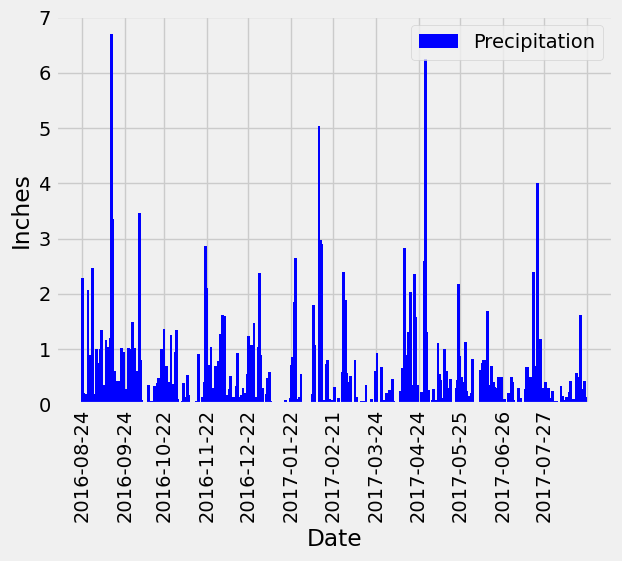

In [137]:
# # Use Pandas Plotting with Matplotlib to plot the data
label=["2016-08-23", "2016-10-01", "2016-11-09", "2016-12-19", "2017-01-28", "2017-03-09", "2017-04-18", "2017-05-31", "2017-07-10"]
# plt.bar(x=precip_df['date'], color='blue', height=precip_df['prcp'], alpha=0.5, align="center", width=2)

# Axis.set_major_locator(plt.xaxis, years)  
fig, ax = plt.subplots() 
ax.bar(x=precip_df['date'], color='blue', height=precip_df['prcp'], align="center", width=2, label='Precipitation')
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend()
  
plt.show()

In [138]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print("Using df.describe to determine mean, std deviation, min, max, and quartiles:")
print(precip_df.describe())

print ("Using secondary dataframe techniques also used in previous classes:")

summary=pd.DataFrame({
    "Mean": precip_df.set_index('date').mean(),
    "Median": precip_df.set_index('date').median(),
    "Variance": precip_df.set_index('date').var(),
    "Std. Dev.": precip_df.set_index('date').std(),
    "Std. Err.": precip_df.set_index('date').sem()
})
summary

Using df.describe to determine mean, std deviation, min, max, and quartiles:
              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000
Using secondary dataframe techniques also used in previous classes:


,Mean,Median,Variance,Std. Dev.,Std. Err.
prcp,0.176462,0.02,0.211865,0.460288,0.010254


# Exploratory Station Analysis

In [139]:
# Design a query to calculate the total number stations in the dataset

total_stations=session.query(station).\
    group_by(station.station).count()

#or you can also use:
#total_stations=session.query(measurement).\
# group_by(measurement.station).count()

print(f"The total number of stations is: {total_stations}")

The total number of stations is: 9


In [140]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

total_stations=session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
total_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [141]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

max_temp=session.query(func.max(measurement.tobs)).\
    filter(measurement.station=='USC00519281').all()

min_temp=session.query(func.min(measurement.tobs)).\
    filter(measurement.station=='USC00519281').all()

avg_temp=session.query(func.avg(measurement.tobs)).\
    filter(measurement.station=='USC00519281').all()

print(f"The max temp of station USC00519281 is {max_temp[0][0]} F")
print(f"The min temp of station USC00519281 is {min_temp[0][0]} F")
print(f"The average temp of station USC00519281 is {round(avg_temp[0][0],1)} F")

The max temp of station USC00519281 is 85.0 F
The min temp of station USC00519281 is 54.0 F
The average temp of station USC00519281 is 71.7 F


In [142]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#perform session query for specific station, where date is last 12 months
year=session.query(measurement.date, measurement.tobs).\
    filter(measurement.station=='USC00519281', measurement.date>=year_ago).all()
year

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [143]:
#convert this query into a dataframe
year_df=pd.DataFrame(year)
year_df

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


Text(0.5, 0, 'Temperature')

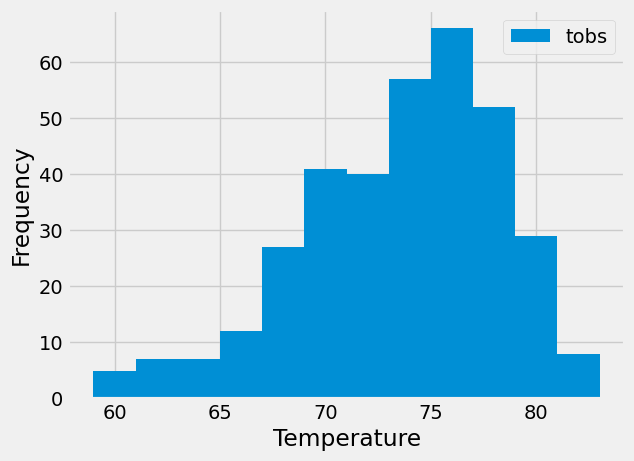

In [144]:
#plot using pandas plot
year_df.plot.hist(bins=12)

plt.xlabel("Temperature")

# Close session

In [145]:
# Close Session
session.close()